# Telescope observation

- Start off on a cloud day.
- Implement your weather forecast based on the above probabilities.
- Run your simulator for N days (with $N\gtrsim 10^4$).
- Prepare a plot with the number of days on the x axis and the cumulative fraction of, say, sunny days over the number of days so far on the y axis. This is called a trace-plot, showing how our estimate of p(clear) evolves as the chain samples.
- Prepare a histogram of the above plot. This reveals the distribution of p(clear).
- Use a summary statistics to determine the most likely value and an error on our estimate.

We know that: 
- p(clear tomorrow|cloudy today) = p(cloudy tomorrow|cloudy today) = 0.5
- p(clear tomorrow|clear today) = 0.9
- p(cloudy tomorrow|clear today) = 0.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astroML.stats

In [2]:
#Function that determs the weather of tomorrow based on the weather today and the probability
def tomorrow(today):
    prob_today = np.random.uniform(0, 1)
    if today == 0:
        if prob_today < 0.5: return 1
        else: return 0
    if today == 1:
        if prob_today < 0.9: return 1
        else: return 0

## Comulative fraction of clear day

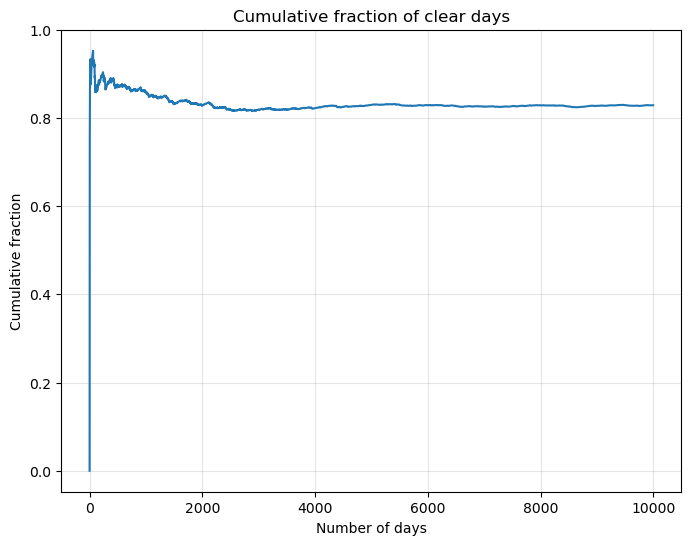

In [4]:
N=10000 #Number of days
today = 0 #We start on a cloudy day
weather = np.empty(N)
weather[0] = today 

#Determ the weather for the next N days
for i in range (N-1): 
    weather[i+1]=tomorrow(weather[i])

#Compute the cumulative probability of clear weather for different value of N
prob_clear =  np.cumsum(weather)/np.arange(1, N+1)

#Trace plot 
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.grid(c='grey', alpha = 0.2)
ax.set_xlabel('Number of days')
ax.set_ylabel('Cumulative fraction')
ax.set_title('Cumulative fraction of clear days')
ax.plot(prob_clear)

As we can observe from the trace plot, the process is not stationary within the first few days, we need a burn-in phase

## Distribution of p(clear)

Text(0.5, 1.0, 'Cumulative fraction of clear days histogram')

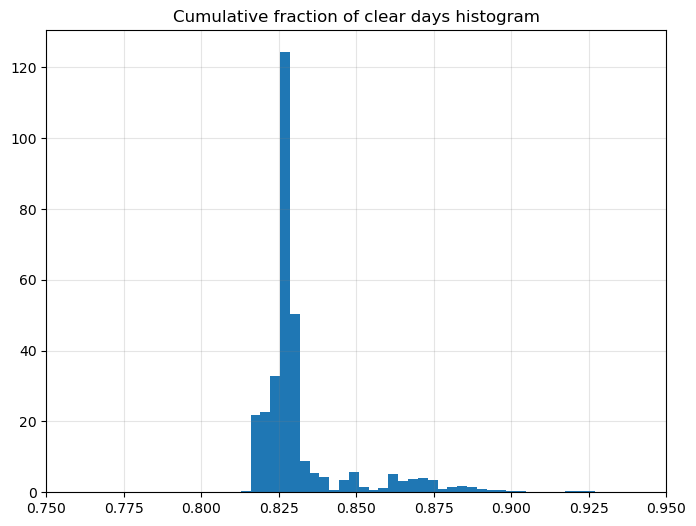

In [6]:
#Histogram 
fig1 = plt.figure(figsize=(8,6))
ax1 = fig1.gca()
ax1.grid(c='grey', alpha = 0.2)
ax1.hist(prob_clear, bins=300, density=True)
ax1.set_xlim(0.75, 0.95)
ax1.set_title('Cumulative fraction of clear days histogram')

## Some statistics

In [7]:
#Statistics
print(np.median(prob_clear))
print(astroML.stats.sigmaG(prob_clear))
print(min(prob_clear), max(prob_clear))

0.8277106866992732
0.0033583729043039023
0.0 0.9523809523809523


## Burn-in phase

How many days should I remove in the burn-in phase?


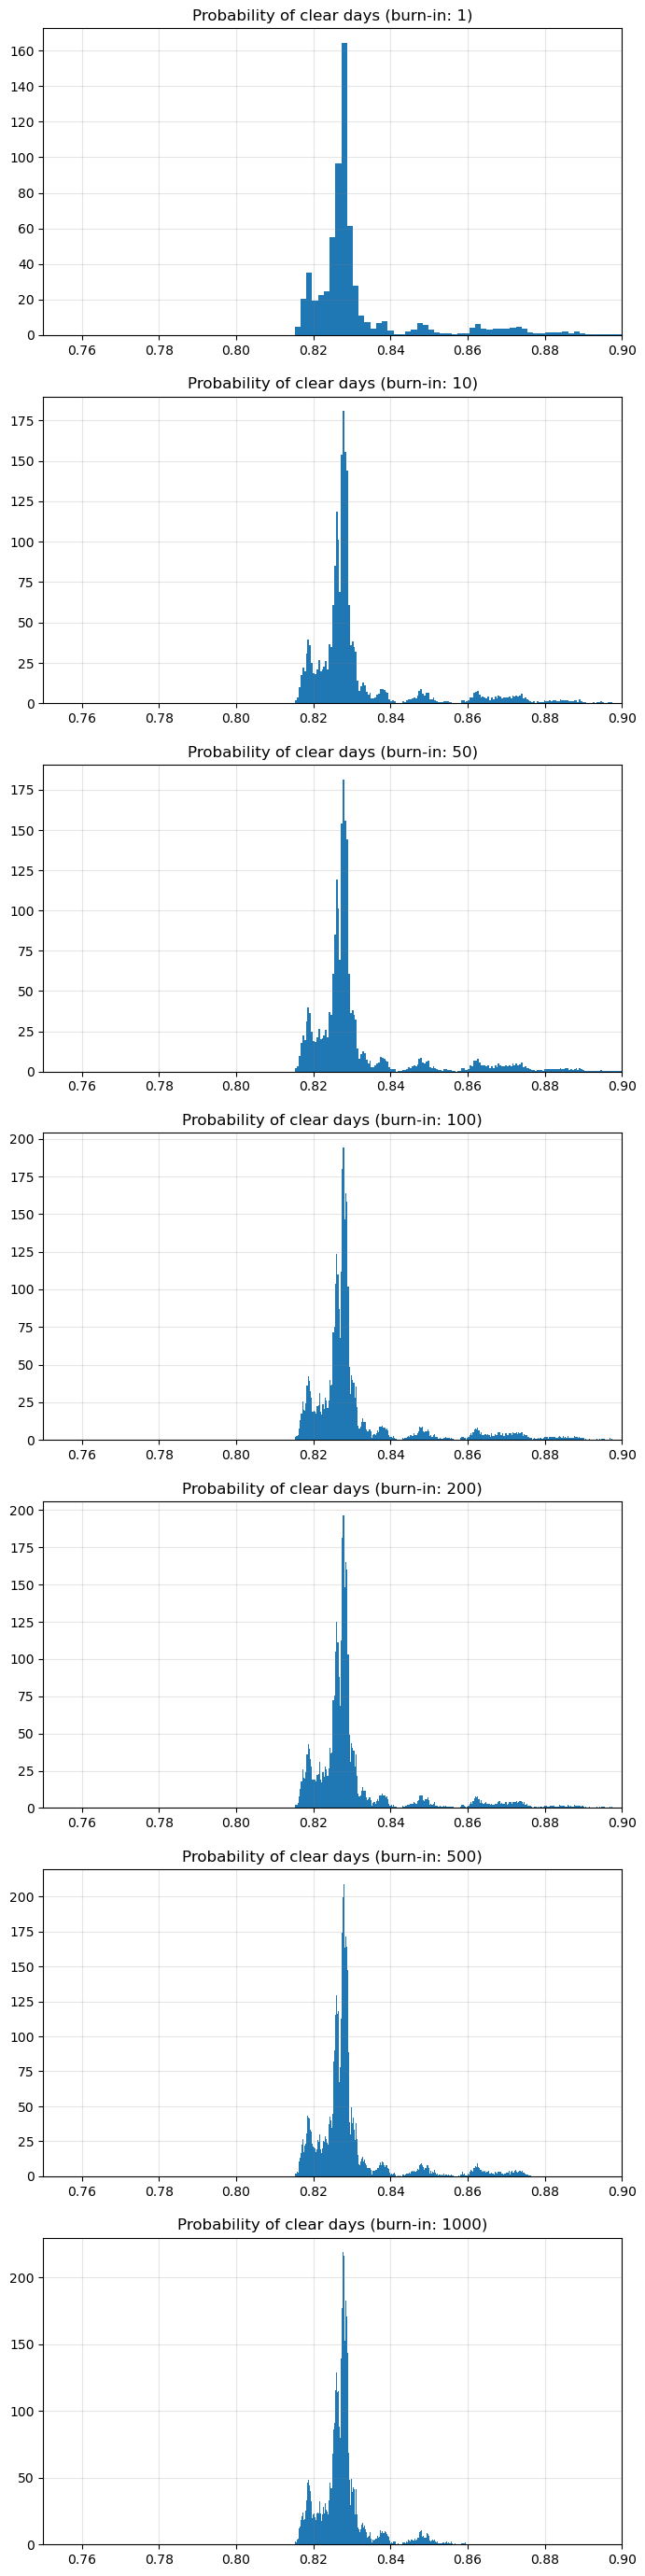

In [8]:
burns=[1, 10, 50, 100, 200, 500, 1000]

fig3, ax3 = plt.subplots(len(burns), 1, figsize = (8, 5*len(burns)))

for i, b in enumerate(burns):
    ax3[i].hist(prob_clear[b:], bins = 300, density = True)
    ax3[i].set_title(f'Probability of clear days (burn-in: {b})')
    ax3[i].grid(c='grey', alpha = 0.2)
    ax3[i].set_xlim(0.75, 0.9)

How the statistics change with different burn-in?

In [12]:
for b in burns:
    print(f"Discarding the first {b} points:\n\tMedian = {np.median(prob_clear[b:]):.3f}")
    print(f"\tInterquantile range = {astroML.stats.sigmaG(prob_clear[b:]):.3f}") #Compute the rank-based estimate of the standard deviation
    print(f"\tMinimum = {min(prob_clear[b:]):.3f}")
    print(f"\tMaximum = {max(prob_clear[b:]):.3f}")

Discarding the first 1 points:
	Median = 0.828
	Interquantile range = 0.003
	Minimum = 0.500
	Maximum = 0.952
Discarding the first 10 points:
	Median = 0.828
	Interquantile range = 0.003
	Minimum = 0.815
	Maximum = 0.952
Discarding the first 50 points:
	Median = 0.828
	Interquantile range = 0.003
	Minimum = 0.815
	Maximum = 0.952
Discarding the first 100 points:
	Median = 0.828
	Interquantile range = 0.003
	Minimum = 0.815
	Maximum = 0.904
Discarding the first 200 points:
	Median = 0.828
	Interquantile range = 0.003
	Minimum = 0.815
	Maximum = 0.904
Discarding the first 500 points:
	Median = 0.828
	Interquantile range = 0.003
	Minimum = 0.815
	Maximum = 0.877
Discarding the first 1000 points:
	Median = 0.827
	Interquantile range = 0.003
	Minimum = 0.815
	Maximum = 0.859


We can observe that the median doesn't change until we discard 1000 as well as the $\sigma_G$ (They are rank-based statistics).